<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización

El área de visualización se define como las técnicas que nos permiten obtener una representación gráfica de la información. 

La visualización toma especial importancia a la hora de transmitir un mensaje claro a clientes, personal investigador, pacientes y, en general, usuarios de un proceso o aplicación en el que se trabaja con datos.

Antes de comenzar a trabajar con visualizaciones vamos a explorar ciertos conceptos que nos permitan realizar una visualización clara.

Una buena visualización contendrá generalmente los siguientes atributos:

- Claridad: Una buena visualización es capaz de mostrar con claridad un mensaje que de otra forma sería difícil de explicar con palabras. Conexiones y conclusiones complejas extraídas de los datos se muestran de forma clara a través de la visualización.

- Transformación de datos: Los datos de entrada a la visualización son tratados de forma apropiada para apoyar el concepto que se pretende ilustrar.

- Diseño: Una buena visualización tiene en cuenta la paleta de colores y el contraste entre estos para apoyar a su mensaje. El uso de formas y marcadores puede también apoyar la construcción de la visualización.

- Conocimiento del Dataset: Una buena visualización es siempre coherente con el conjunto de datos que se utiliza a la entrada y muestra valores razonables dentro de las variables que se utilizan para construir las gráficas.

- Texto y etiquetas: Una buena visualización contiene en si misma toda la información necesaria para ser interpretada, incluyendo texto y etiquetas en ejes y puntos que sean necesarias para su interpretación.


Durante esta clase utilizaremos las librerías **pandas** (para procesar los datos) y **seaborn** para construir las gráficas.

In [10]:
# Como importar las librerías
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [11]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)

In [12]:
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


# Gráficos de nubes de puntos

Los gráficos de nubes de puntos (scatter plot) utilizan puntos para representar valores con respecto a dos o tres variables diferentes. Estos gráficos tienen su utilidad cuando interesa representar una relación entre dos o tres variables sin que estas presenten un orden determinado.

Vamos a realizar un ejemplo utilizando las variables de longitud de las aletas(flipper_length_mm) y el peso de los pingüinos (body_mass_g).

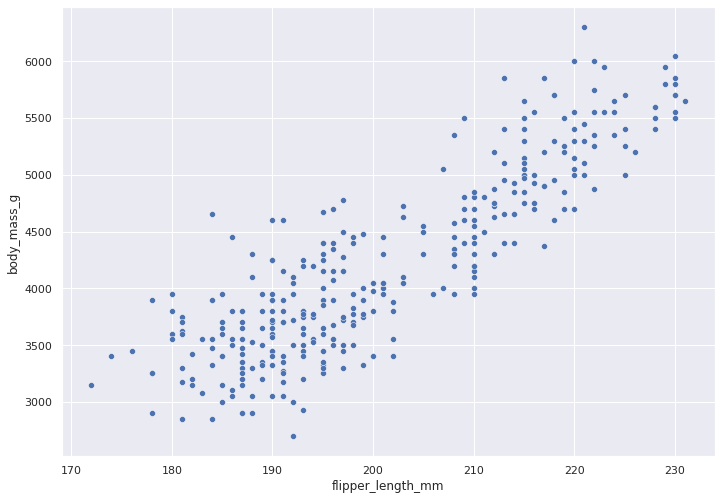

In [16]:
fig = sns.scatterplot(data=dataset, x="flipper_length_mm", y="body_mass_g")

Como se puede apreciar parece que existe una relación clara entre la longitud de las aletas de un pingüino. Sin embargo, cabría la opción de preguntarse si además existe alguna relación a tener en cuenta con el sexo de los pingüinos. Para representar valores categóricos o discretos sin aumentar la dimensionalidad de una gráfica scatter plot se puede recurrir a cambiar los colores o formas de los puntos representados.

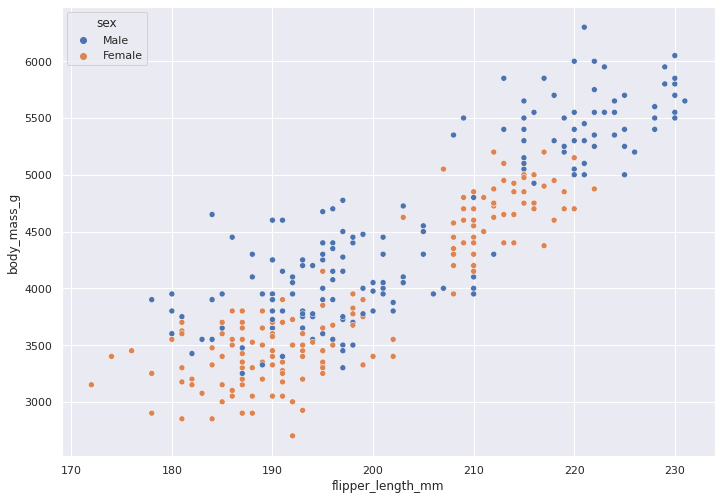

In [19]:
fig = sns.scatterplot(data=dataset, x="flipper_length_mm", y="body_mass_g", hue="sex")

# Ejercicio:

Suponed que trabajáis para una empresa de transporte de animales y necesitáis información para decidir el tamaño de la flota de transportes que vais a enviar en función del peso de los pingüinos.

Sin embargo, la única información que se os proporcionará es la especie de pingüino. Dibujad una visualización utilizando las variables, flipper_length_mm, body_mass_g y species que os permita tomar esta decisión utilizando la función sns.scatterplot.